# Decision Tree classifier on Car Evaluation dataset

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

## Read Data 

In [2]:
import pandas as pd

df = pd.read_csv('car_evaluation.csv', header=None)

col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names

In [3]:
df.shape

(1728, 7)

In [4]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [6]:
y = df['class']
y.head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: class, dtype: object

In [7]:
y.unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [8]:
df = df.drop(['class'], axis = 1)

In [9]:
for i in df.columns:
    print("categories in", i, ":" , df[i].unique())

categories in buying : ['vhigh' 'high' 'med' 'low']
categories in maint : ['vhigh' 'high' 'med' 'low']
categories in doors : ['2' '3' '4' '5more']
categories in persons : ['2' '4' 'more']
categories in lug_boot : ['small' 'med' 'big']
categories in safety : ['low' 'med' 'high']


## Data Visualization

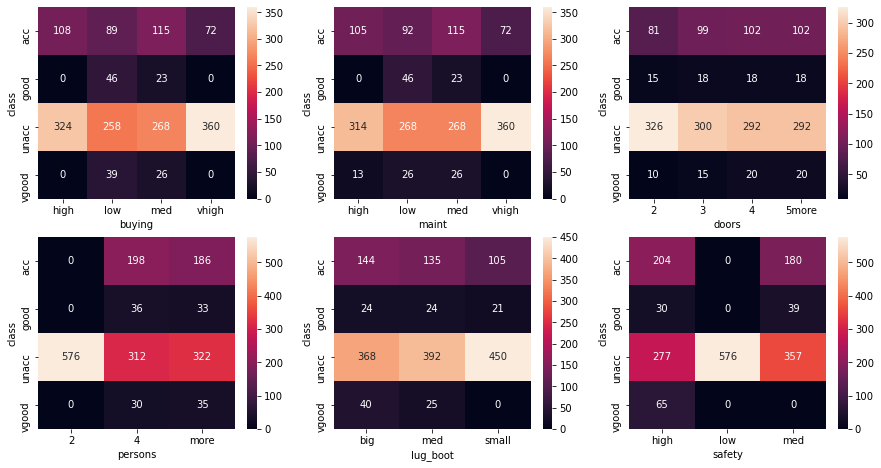

In [10]:
plt.figure(figsize=(15, 12))
for i in range(6):
    a = pd.crosstab(y, df.iloc[:, i])
    ax = plt.subplot(3, 3, i+1)
    sns.heatmap(a, annot=True, fmt="d")

<AxesSubplot:xlabel='class', ylabel='count'>

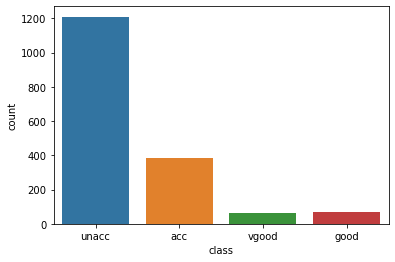

In [11]:
sns.countplot(x=y, data=df)

## Encoding Categorical Data

In [12]:
df2 = pd.get_dummies(df)
df2.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


## Test Train split

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df2, y, test_size = 0.25, random_state = 42)

## Decision Tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=42)

model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=42)

## Result

In [15]:
train_acc = model.score(x_train, y_train)
test_acc = model.score(x_test, y_test)

print('training accuracy =', train_acc)
print('test accuracy =', test_acc)

training accuracy = 0.9753086419753086
test accuracy = 0.9675925925925926


In [16]:
y_pred = model.predict(x_test)

<AxesSubplot:>

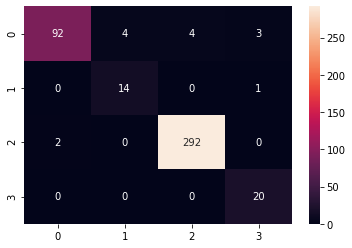

In [17]:
from sklearn.metrics import confusion_matrix
cnf = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf, annot=True, fmt="d")

## Save Model

In [18]:
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))